# France price prediction contest EDA

### Variable description

- annee_naissance - date of birth
- annee_permis - year of permission
- puis_fiscale - power tax
- avc_veh - ???
- kmage_annuel - ежегодный ???
- CRM - ???
- var12 - weight

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [5]:
# Utils

def barplot_col_vs_all(df, colls_to_build, target_col, target_col_is_y_axis=True, marker='v', alpha=0.2):
    print('Barplots for {}'.format(target_col))
    for col in colls_to_build:
        if col == target_col:
            continue
        print(col)
        if target_col_is_y_axis:
            x_col, y_col = col, target_col
        else:
            x_col, y_col = target_col, col

        plt.scatter(df[x_col], df[y_col], alpha=alpha, marker=marker)
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title('{0} vs {1}'.format(target_col, col))
        plt.show()
        

def barplot_compare_2cols_vs_all(df1, df2, colls_to_build, target_col, target_col_is_y_axis=True, marker='v', alpha=0.2):
    print('Barplots for {}'.format(target_col))
    for col in colls_to_build:
        if col == target_col:
            continue
        print(col)
        if target_col_is_y_axis:
            x_col, y_col = col, target_col
        else:
            x_col, y_col = target_col, col

        plt.scatter(df1[x_col], df1[y_col], alpha=alpha, marker=marker, label='df1', color='blue')
        plt.scatter(df2[x_col], df2[y_col], alpha=alpha, marker=marker, label='df2', color='red')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.legend()
        plt.title('{0} vs {1}'.format(target_col, col))
        plt.show()

def barplot_compare_mult_cols_vs_all(df1, dfs, colls_to_build, target_col, target_col_is_y_axis=True, marker='v', alpha=0.2):
    print('Barplots for {}'.format(target_col))
    
    colors = ['r', 'm', 'y', 'c', 'k']
    
    for col in colls_to_build:
        if col == target_col:
            continue
        print(col)
        if target_col_is_y_axis:
            x_col, y_col = col, target_col
        else:
            x_col, y_col = target_col, col

        plt.scatter(df1[x_col], df1[y_col], alpha=alpha, marker=marker, label='df1', color='grey')
        k = 0
        for df2 in dfs:
            plt.scatter(df2[x_col], df2[y_col], alpha=alpha, marker=marker, label='df_n', color=colors[k])
            k = (k + 1) % len(colors)
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.legend()
        plt.title('{0} vs {1}'.format(target_col, col))
        plt.show()        

def basic_describe_num_variable(df, col_name):
    target_col = X_num[col_name]
    print('>> {0}'.format(col_name).upper())
    print('{} summary:'.format(col_name))
    print(target_col.describe())

    print('\nCount: {}'.format(target_col.count()))

    print('\nHas NaNs:\t{0}\n% of the data:\t{1:.3}%\nnumber of NaNs:\t{2}'.format(target_col.hasnans,
                                                              float(target_col.isnull().sum()) / len(target_col) * 100,
                                                              target_col.isnull().sum()))

    print('\nNumber of unique items: {0}'.format(len(target_col.unique())))
    print('====================\n')

In [6]:
num_cols = ['annee_naissance', 'annee_permis', 'puis_fiscale', 'anc_veh', 'kmage_annuel', 'crm', 'var1', 'var2', 'var3', \
            'var4', 'var5', 'var9', 'var10', 'var11', 'var12', 'var13', 'var15', 'var17', 'var18', 'var19', 'var20', \
            'var21', 'var22']
cat_cols = ['marque', 'codepostal', 'energie_veh', 'profession', 'var6', 'var7', 'var8', 'var14', 'var16']

In [7]:
data = pd.read_csv('./data/ech_apprentissage.csv', sep=';', index_col='id', dtype={})
data.head(2)

D:\soft\dev\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,annee_naissance,annee_permis,marque,puis_fiscale,anc_veh,codepostal,energie_veh,kmage_annuel,crm,profession,...,var14,var15,var16,var17,var18,var19,var20,var21,var22,prime_tot_ttc
id,,,,,,,,,,,,,,,,,,,,,
1,1986.0,2006.0,RENAULT,4,1,1034,gpl,2924,68,"enseignant, formateur, chercheur",...,N,1,1,1,27,0,0,0,1,254.75
2,1986.0,2006.0,RENAULT,8,2,1034,gpl,11580,50,"enseignant, formateur, chercheur",...,N,2,1,1,28,0,0,0,1,259.89


In [4]:
data.shape

(300000, 33)

In [4]:
y = data['prime_tot_ttc']
X = data.drop('prime_tot_ttc', axis=1)

In [13]:
test_data = pd.read_csv('./data/ech_test.csv', sep=';', index_col='id')

In [16]:
pred_data = pd.read_csv('./test_ans.csv', sep=';', index_col='id')
pred_data.head()

,prime_tot_ttc
id,
300001,292.870697
300002,187.404861
300003,249.357376
300004,346.714142
300005,290.529602


In [20]:
pred_data.shape

(30000, 1)

In [23]:
test_data_ans = test_data.copy()
test_data_ans['prime_tot_ttc'] = pred_data['prime_tot_ttc']

Barplots for prime_tot_ttc
annee_naissance


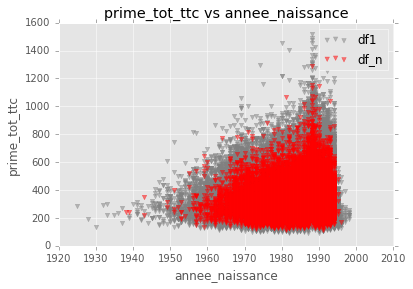

annee_permis


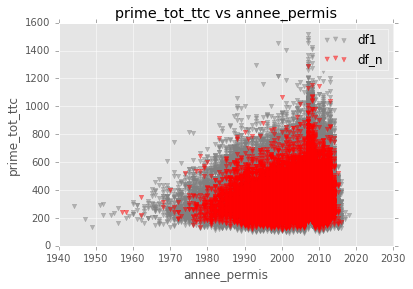

puis_fiscale


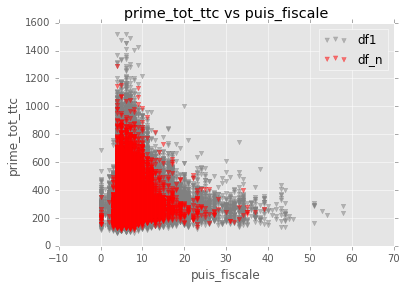

anc_veh


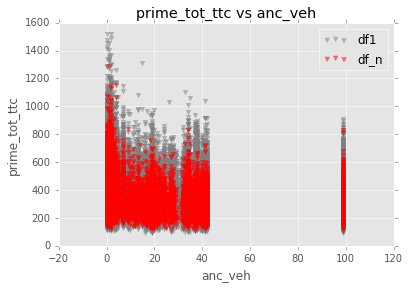

kmage_annuel


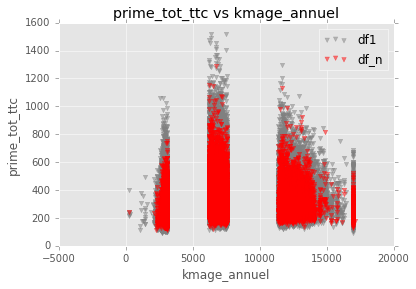

crm


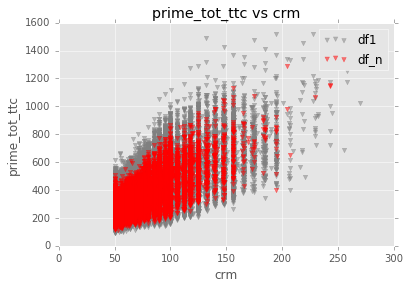

var1


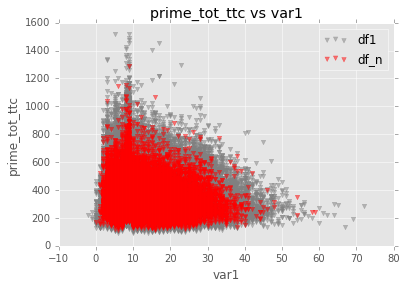

var2


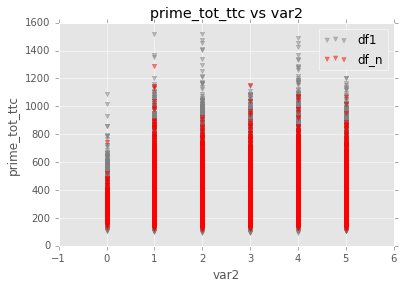

var3


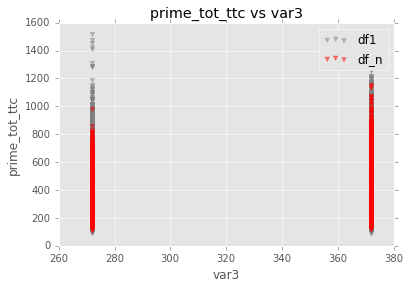

var4


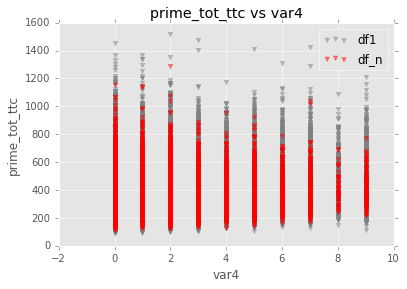

var5


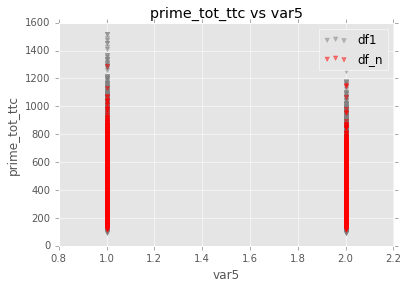

var9


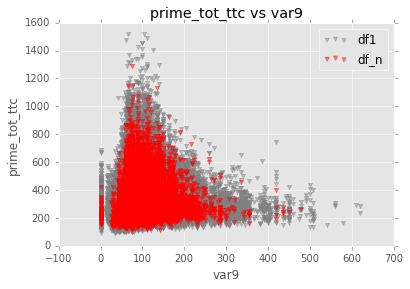

var10


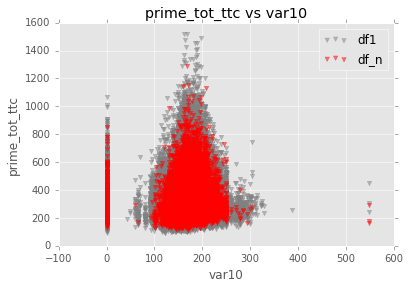

var11


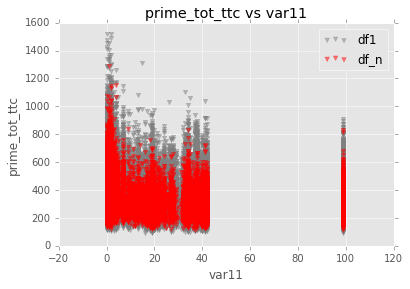

var12


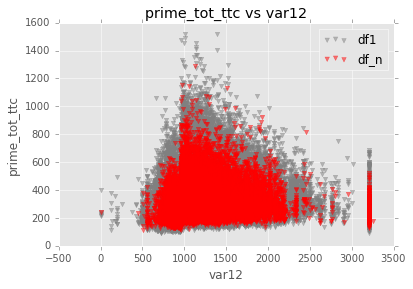

var13


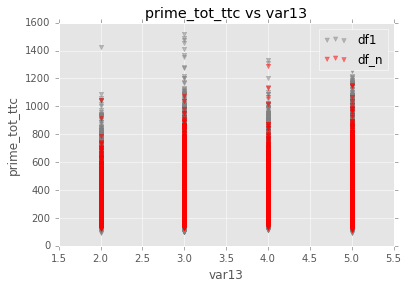

var15


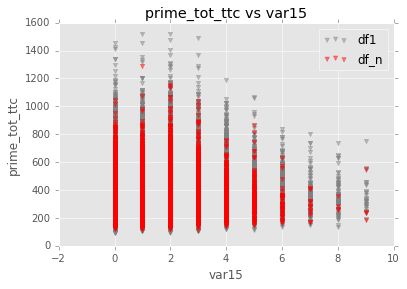

var17


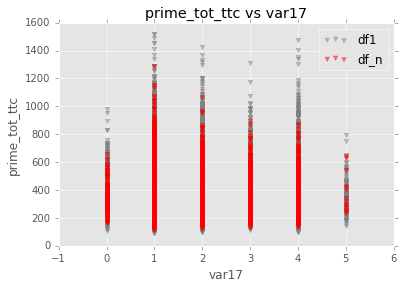

var18


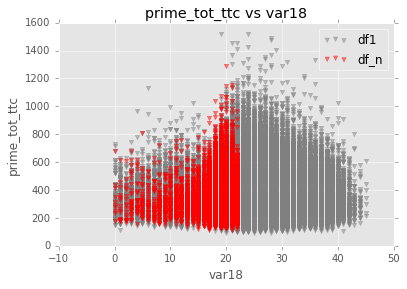

var19


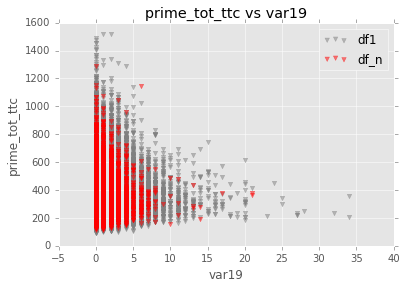

var20


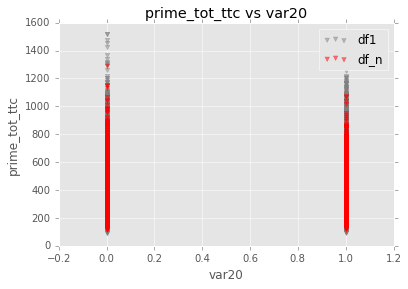

var21


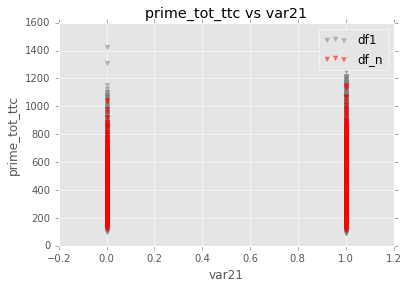

var22


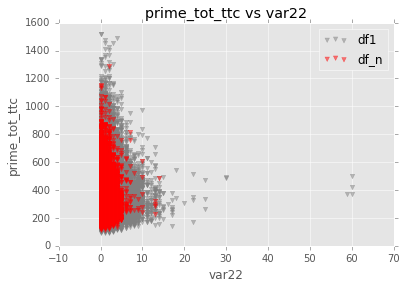

In [24]:
barplot_compare_mult_cols_vs_all(data, [test_data_ans], num_cols,
                             'prime_tot_ttc', alpha=0.5)

In [27]:
max_test_var18 = test_data_ans['var18'].max()
max_test_var18

22

Barplots for prime_tot_ttc
annee_naissance


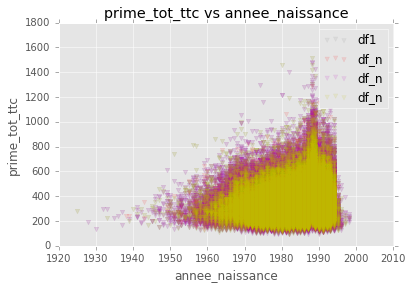

annee_permis


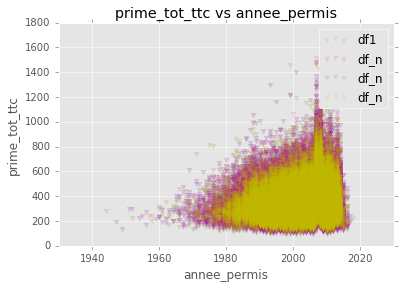

puis_fiscale


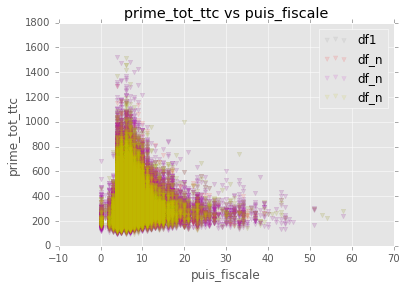

anc_veh


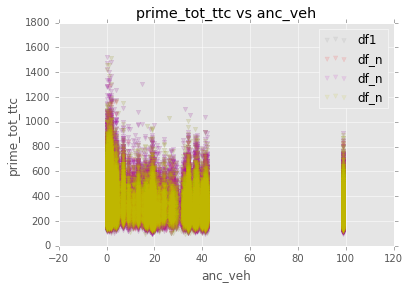

kmage_annuel


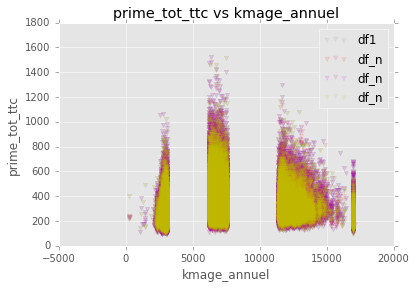

crm


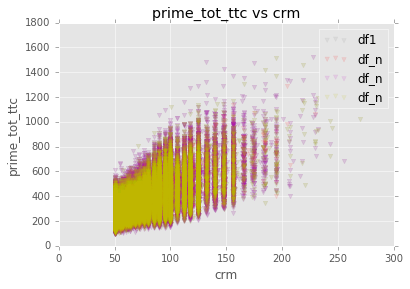

var1


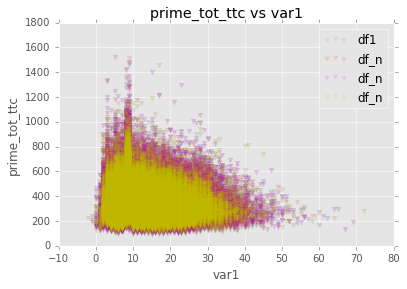

var2


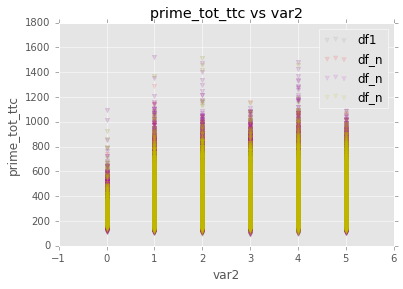

var3


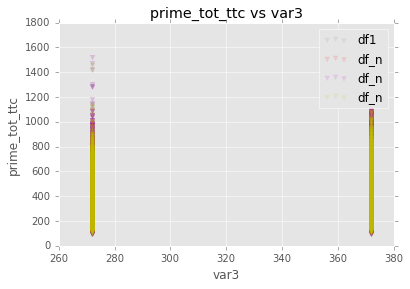

var4


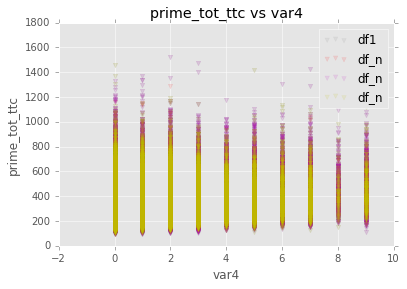

var5


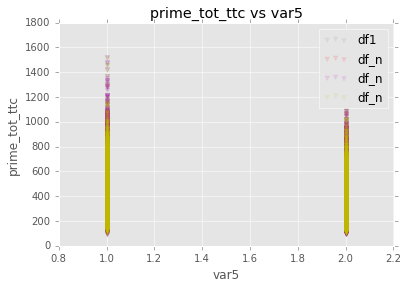

var9


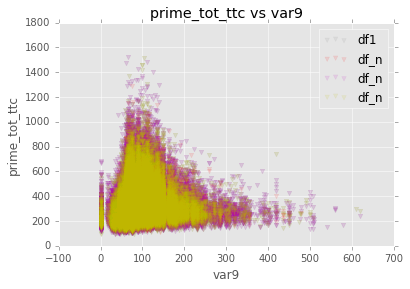

var10


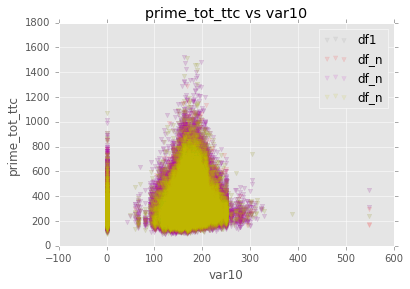

var11


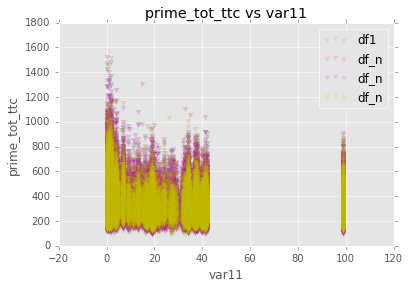

var12


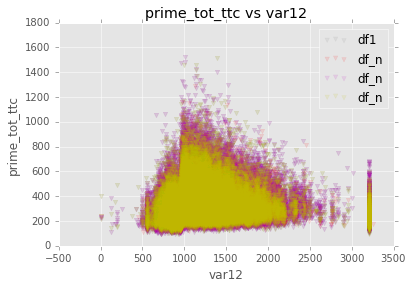

var13


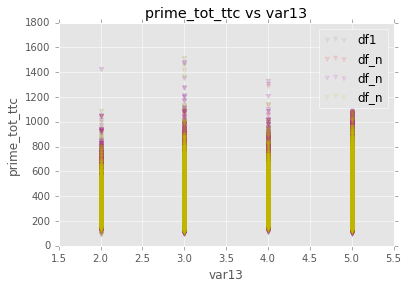

var15


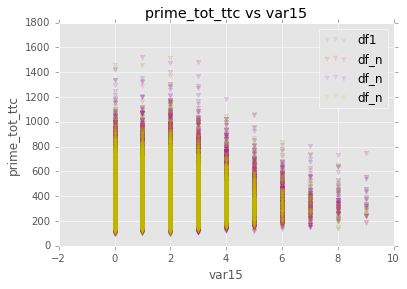

var17


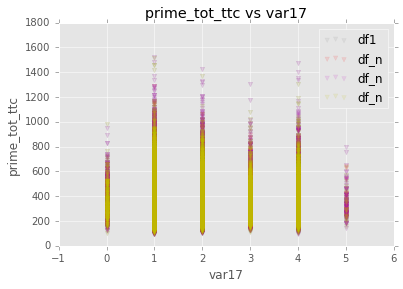

var18


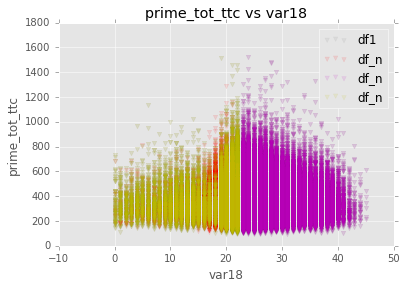

var19


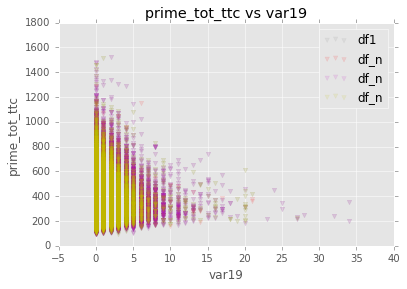

var20


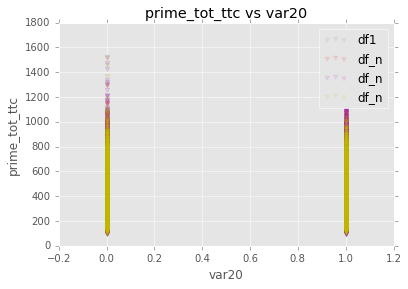

var21


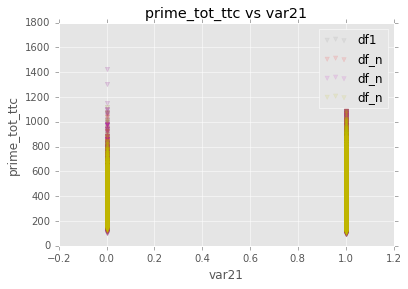

var22


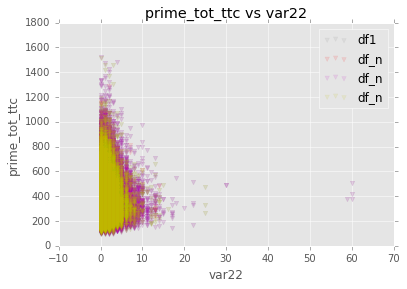

In [36]:
train_small_var18 = data[data['var18'] <= max_test_var18]
train_large_var18 = data[data['var18'] > max_test_var18]

barplot_compare_mult_cols_vs_all(data, [test_data_ans, train_large_var18, train_small_var18], num_cols,
                             'prime_tot_ttc', alpha=0.1)

In [38]:
sum(data['var18'] < 25), sum(data['var18'] > 25)

(161628, 108968)

## Conclusion

**var18** in test data is limited to 25 

In [8]:
import pandas_profiling

pandas_profiling.ProfileReport(data)

Number of variables,34
Number of observations,300000
Total Missing (%),0.0%
Total size in memory,77.8 MiB
Average record size in memory,272.0 B
Numeric,22
Categorical,9
Date,0
Text (Unique),0
Rejected,3
Distinct count,44
